### 1.Load the dataset and explore the variables.

In [62]:
#importing the neccessary packages
import mysql.connector
from mysql.connector import connect
from getpass import getpass
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv("customer_churn.csv")

In [64]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 3.Extract the target variable.

In [65]:
y = df.Churn.replace({'Yes': 1, 'No': 0}) #replacing the flags with numeric values

In [66]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### 4.Extract the independent variables and scale them.

In [67]:
x = df[['tenure', 'SeniorCitizen','MonthlyCharges']]

In [68]:
x

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [70]:

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()


#Scale and code separate columns:105555666655

feature_encoder = ColumnTransformer(transformers = [
                                                   ("num",numeric_transformer,x),
                                                   ])

### 5.Build the logistic regression model.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=42)

classifier = LogisticRegression(random_state=16)

# fit the model with data
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)

y_test_pred = classifier.predict(X_test)




In [72]:
import sklearn.metrics as metrics


cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)


In [73]:
cnf_matrix

array([[1420,  119],
       [ 317,  257]], dtype=int64)

Text(0.5, 257.44, 'Prediction')

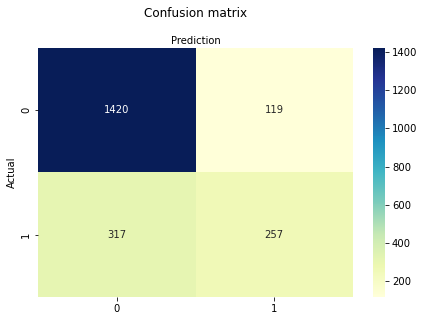

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediction')

### 6.Evaluate the model.

In [75]:
from sklearn.metrics import classification_report
target_names = ['Churned', 'Not Churned']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

     Churned       0.82      0.92      0.87      1539
 Not Churned       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [76]:

print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))


Train Score : 0.79026369168357
Test Score : 0.7936583057264552


### 7.Even a simple model will give us more than 70% accuracy. Why?

In [77]:
#Because we don't have too many features used as independent variables.

### 8.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
### Build and evaluate the logistic regression model. Is it there any improvement?

In [78]:
import imblearn
print(imblearn.__version__)

0.7.0


In [79]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [80]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(4930, 3)
(7270, 3)


In [81]:
y_train.value_counts()/len(y_train)


0    0.737323
1    0.262677
Name: Churn, dtype: float64

In [82]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)


0    0.5
1    0.5
Name: Churn, dtype: float64

In [83]:
model = LogisticRegression()
model.fit(X_train_SMOTE, y_train_SMOTE)

pred_train_SMOTE = model.predict(X_train_SMOTE)
pred_test_SMOTE = model.predict(X_test)
print(classification_report(y_test, pred_test_SMOTE))
print(classification_report(y_train_SMOTE, pred_train_SMOTE))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1539
           1       0.51      0.76      0.61       574

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      3635
           1       0.72      0.73      0.72      3635

    accuracy                           0.72      7270
   macro avg       0.72      0.72      0.72      7270
weighted avg       0.72      0.72      0.72      7270



In [ ]:
### Accuracy has decreased from 79% to 74%.

### 9.Tomek links are pairs of very close instances, but of opposite classes.
### Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
### Build and evaluate the logistic regression model. Is it there any improvement?

In [84]:
from imblearn.under_sampling import TomekLinks


In [85]:
X= X_train
y= y_train

In [86]:
tl = TomekLinks() # play arounds with sampling strategy to improve the imbalance

# TODO: CHECK A RIGHT IMPUT FOR sampling_strategy
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [87]:
display(X_train_tl.shape)
X_train.shape

(4595, 3)

(4930, 3)

In [88]:
y_train_tl.value_counts()/len(y_train_tl)

0    0.718172
1    0.281828
Name: Churn, dtype: float64

In [89]:
y_train.value_counts()

0    3635
1    1295
Name: Churn, dtype: int64

In [90]:
model = LogisticRegression()
model.fit(X_train_tl, y_train_tl)

pred_train_tl = model.predict(X_train_tl)
pred_test_tl = model.predict(X_test)
print(classification_report(y_test, pred_test_tl))
print(classification_report(y_train_tl, pred_train_tl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.63      0.52      0.57       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3300
           1       0.67      0.51      0.58      1295

    accuracy                           0.79      4595
   macro avg       0.75      0.70      0.72      4595
weighted avg       0.78      0.79      0.78      4595



In [ ]:
### Accuracy increased back to 79%. 